# Final Project Part 2: Sentiment Analysis
Madeline Craft

#### Data Formatting

First, I will import every package I will need for this project.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import numpy as np
from numpy import genfromtxt
import nltk 
import codecs
nltk.download('punkt')
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
import operator 
import json
from collections import Counter
import re
import sys
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
import csv
from textblob import TextBlob
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import imageio

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madelinecraft/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madelinecraft/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I need to set the working directory so I can pull the csv files full of web-scraped tweets from Jade.

In [24]:
os.getcwd()
os.chdir("/Users/madelinecraft/Desktop/Classes/Python")
os.getcwd()

'/Users/madelinecraft/Desktop/Classes/Python'

The truedata dataframe contains the tweets categorized by Jade as correct information. The falsedata dataframe contains the tweets categorized by Jade as misinformation. 

In [25]:
truedata = pd.read_csv('TrueTweets.csv',delimiter=',',encoding='utf-8')
falsedata = pd.read_csv('FalseTweets.csv',delimiter=',',encoding='utf-8')

Because I'm going to join these two dataframes I need to create an indicator variable which indicates which file each observation came from. 

In [26]:
truedata['true_indicator'] = 1
falsedata['true_indicator'] = 0

This next cell joins the two dataframes.

In [27]:
data = pd.concat([truedata, falsedata])

I need to drop any missing data from my joined dataframe.

In [28]:
data.dropna(inplace=True)

The next step after reading in the data is preprocessing the data. This includes removing things like stop-words, symbols, numbers, etc. from the tweet. Because I'll be making modifications during preprocessing, I'm creating a new column called "original_tweet" to preserve the original tweet. All modifications will be made to the column called "text".

In [29]:
data['original_tweet'] = data['text']

#### Preprocessing

To begin the preprocessing stage, I'll turn every uppercase letter into a lowercase letter.

In [30]:
data['text'] = data['text'].str.lower()
data.head()

,Unnamed: 0,favorite_count,id,retweet_count,text,timestamp,user_follower_count,user_id,user_screen_name,true_indicator,original_tweet
0,0,138,9.960000e+17,50,it's not easy to vaccinate every child. meet d...,Tue May 15 14:00:09 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,It's not easy to vaccinate every child. Meet D...
1,1,203,9.940000e+17,95,the largest cholera vaccination drive in histo...,Thu May 10 05:00:05 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,The largest cholera vaccination drive in histo...
2,2,513,9.900000e+17,244,developing a universal flu vaccine is more fea...,Fri Apr 27 18:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Developing a universal flu vaccine is more fea...
3,3,45,9.890000e+17,22,exciting news: our own @johnfmodlin received t...,Thu Apr 26 04:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Exciting news: Our own @JohnFModlin received t...
4,4,289,9.890000e+17,132,1.5 million children dying from diseases that ...,Wed Apr 25 17:08:50 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,1.5 million children dying from diseases that ...


Next, I'll remove all symbols using a regular expression to identify the symbols and replace them with a blank.

In [31]:
data['text'] = data['text'].str.replace('[^\w\s]','')
data.head()

,Unnamed: 0,favorite_count,id,retweet_count,text,timestamp,user_follower_count,user_id,user_screen_name,true_indicator,original_tweet
0,0,138,9.960000e+17,50,its not easy to vaccinate every child meet dr ...,Tue May 15 14:00:09 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,It's not easy to vaccinate every child. Meet D...
1,1,203,9.940000e+17,95,the largest cholera vaccination drive in histo...,Thu May 10 05:00:05 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,The largest cholera vaccination drive in histo...
2,2,513,9.900000e+17,244,developing a universal flu vaccine is more fea...,Fri Apr 27 18:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Developing a universal flu vaccine is more fea...
3,3,45,9.890000e+17,22,exciting news our own johnfmodlin received the...,Thu Apr 26 04:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Exciting news: Our own @JohnFModlin received t...
4,4,289,9.890000e+17,132,15 million children dying from diseases that c...,Wed Apr 25 17:08:50 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,1.5 million children dying from diseases that ...


Next, I'll remove stop words which don't add any information to the interpretation of sentiment. 


In [32]:
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

,Unnamed: 0,favorite_count,id,retweet_count,text,timestamp,user_follower_count,user_id,user_screen_name,true_indicator,original_tweet
0,0,138,9.960000e+17,50,easy vaccinate every child meet dr adele paddl...,Tue May 15 14:00:09 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,It's not easy to vaccinate every child. Meet D...
1,1,203,9.940000e+17,95,largest cholera vaccination drive history unde...,Thu May 10 05:00:05 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,The largest cholera vaccination drive in histo...
2,2,513,9.900000e+17,244,developing universal flu vaccine feasible 1020...,Fri Apr 27 18:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Developing a universal flu vaccine is more fea...
3,3,45,9.890000e+17,22,exciting news johnfmodlin received 2018 dr cha...,Thu Apr 26 04:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Exciting news: Our own @JohnFModlin received t...
4,4,289,9.890000e+17,132,15 million children dying diseases prevented v...,Wed Apr 25 17:08:50 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,1.5 million children dying from diseases that ...


Finally, I'll remove numbers using a regular expression to identify the numbers and replace them with a blank.

In [33]:
data['text']= data['text'].str.replace('\d+', '')

#### Sentiment Analysis

Now that the data has been preprocessed, I'll use TextBlob to create a column indicating positive/negative sentiment. TextBlob returned sentiment in a tuple containing both polarity and subjectivity. In the second line of code I take the tuple and split it into separate columns: one for polarity and one for sentiment. Polarity and subjectivity are continuous measures on a scale from -1 to +1. 

In [34]:
data['sentiment'] = data['text'].apply(lambda tweet: TextBlob(tweet).sentiment)
data[['polarity', 'subjectivity']] = data['sentiment'].apply(pd.Series)
data.head()

,Unnamed: 0,favorite_count,id,retweet_count,text,timestamp,user_follower_count,user_id,user_screen_name,true_indicator,original_tweet,sentiment,polarity,subjectivity
0,0,138,9.960000e+17,50,easy vaccinate every child meet dr adele paddl...,Tue May 15 14:00:09 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,It's not easy to vaccinate every child. Meet D...,"(0.43333333333333335, 0.8333333333333334)",0.433333,0.833333
1,1,203,9.940000e+17,95,largest cholera vaccination drive history unde...,Thu May 10 05:00:05 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,The largest cholera vaccination drive in histo...,"(0.0, 0.0)",0.000000,0.000000
2,2,513,9.900000e+17,244,developing universal flu vaccine feasible yea...,Fri Apr 27 18:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Developing a universal flu vaccine is more fea...,"(0.5, 0.43333333333333335)",0.500000,0.433333
3,3,45,9.890000e+17,22,exciting news johnfmodlin received dr charles...,Thu Apr 26 04:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Exciting news: Our own @JohnFModlin received t...,"(0.3, 0.8)",0.300000,0.800000
4,4,289,9.890000e+17,132,million children dying diseases prevented vac...,Wed Apr 25 17:08:50 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,1.5 million children dying from diseases that ...,"(-0.2, 0.6)",-0.200000,0.600000


I'll also create a categorical version of polarity. To do this I've created a function where measures greater than 0 are positive, equal to 0 are neutral, and less than 0 are negative.

In [35]:
def f(row):
    if row['polarity'] == 0:
        val = 'neutral'
    elif row['polarity'] > 0:
        val = 'positive'
    else:
        val = 'negative'
    return val

Next I take the function and apply it to the continuous polarity column to create the categorical version called "cat_polarity". 

In [36]:
data['cat_polarity'] = data.apply(f, axis=1)
data.head()

,Unnamed: 0,favorite_count,id,retweet_count,text,timestamp,user_follower_count,user_id,user_screen_name,true_indicator,original_tweet,sentiment,polarity,subjectivity,cat_polarity
0,0,138,9.960000e+17,50,easy vaccinate every child meet dr adele paddl...,Tue May 15 14:00:09 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,It's not easy to vaccinate every child. Meet D...,"(0.43333333333333335, 0.8333333333333334)",0.433333,0.833333,positive
1,1,203,9.940000e+17,95,largest cholera vaccination drive history unde...,Thu May 10 05:00:05 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,The largest cholera vaccination drive in histo...,"(0.0, 0.0)",0.000000,0.000000,neutral
2,2,513,9.900000e+17,244,developing universal flu vaccine feasible yea...,Fri Apr 27 18:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Developing a universal flu vaccine is more fea...,"(0.5, 0.43333333333333335)",0.500000,0.433333,positive
3,3,45,9.890000e+17,22,exciting news johnfmodlin received dr charles...,Thu Apr 26 04:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Exciting news: Our own @JohnFModlin received t...,"(0.3, 0.8)",0.300000,0.800000,positive
4,4,289,9.890000e+17,132,million children dying diseases prevented vac...,Wed Apr 25 17:08:50 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,1.5 million children dying from diseases that ...,"(-0.2, 0.6)",-0.200000,0.600000,negative


To clean up the dataset I'll drop unnecessary columns. 

In [37]:
data.drop(['Unnamed: 0', 'sentiment'], axis=1, inplace=True)
data.head()

,favorite_count,id,retweet_count,text,timestamp,user_follower_count,user_id,user_screen_name,true_indicator,original_tweet,polarity,subjectivity,cat_polarity
0,138,9.960000e+17,50,easy vaccinate every child meet dr adele paddl...,Tue May 15 14:00:09 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,It's not easy to vaccinate every child. Meet D...,0.433333,0.833333,positive
1,203,9.940000e+17,95,largest cholera vaccination drive history unde...,Thu May 10 05:00:05 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,The largest cholera vaccination drive in histo...,0.000000,0.000000,neutral
2,513,9.900000e+17,244,developing universal flu vaccine feasible yea...,Fri Apr 27 18:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Developing a universal flu vaccine is more fea...,0.500000,0.433333,positive
3,45,9.890000e+17,22,exciting news johnfmodlin received dr charles...,Thu Apr 26 04:00:06 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,Exciting news: Our own @JohnFModlin received t...,0.300000,0.800000,positive
4,289,9.890000e+17,132,million children dying diseases prevented vac...,Wed Apr 25 17:08:50 +0000 2018,1927191,17899109.0,b'gatesfoundation',1,1.5 million children dying from diseases that ...,-0.200000,0.600000,negative


#### Descriptive Statistics and Plots

First, out of curiosity, I'd like to take a look at the tweet with the most favorites and the most retweets. To do this I'll first pull the tweet with the most favorites and retweets from the dataframe, count the number of favorites and retweets, and print the results. 

In [43]:
fav_max = np.max(data['favorite_count'])
rt_max  = np.max(data['retweet_count'])

fav = data[data.favorite_count == fav_max].index[0]
rt  = data[data.retweet_count == rt_max].index[0]

print("The tweet with most favorites is: \n{}".format(data['original_tweet'][fav]))
print("Number of likes: {}".format(fav_max))

print("The tweet with most retweets is: \n{}".format(data['original_tweet'][rt]))
print("Number of retweets: {}".format(rt_max))

The tweet with most favorites is: 
375    a) vaccines don't cause autism\nb) EVEN IF THE...
375    Don’t miss the presentation on “Suspected adve...
Name: original_tweet, dtype: object
Number of likes: 188051
The tweet with most retweets is: 
375    a) vaccines don't cause autism\nb) EVEN IF THE...
375    Don’t miss the presentation on “Suspected adve...
Name: original_tweet, dtype: object
Number of retweets: 55655


Next I want to calculate which percentage of the tweets are positive, neutral, and negative. To do this I'll manually calculate the percentages using count functions. 

In [44]:
total_rows=len(data.axes[0])
total_rows

1091

In [45]:
data['cat_polarity'].value_counts()

positive    460
neutral     458
negative    173
Name: cat_polarity, dtype: int64

In [46]:
print("Percentage of positive tweets: {}%".format(460/total_rows))
print("Percentage of neutral tweets: {}%".format(458/total_rows))
print("Percentage de negative tweets: {}%".format(173/total_rows))

Percentage of positive tweets: 0.4216315307057745%
Percentage of neutral tweets: 0.41979835013748856%
Percentage de negative tweets: 0.15857011915673694%


I also want to create a bar chart of the number of positive, neutral, and negative tweets. 

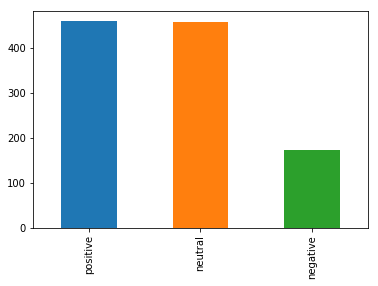

In [47]:
data['cat_polarity'].value_counts().plot(kind='bar')

In addition, I want to see a histogram of the continuous polarity variable. 

(array([  6.,  10.,  35.,  50.,  72., 210., 159.,  67.,  14.,  10.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

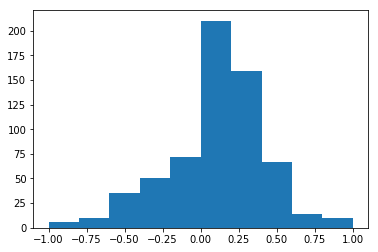

In [48]:
plt.hist(data['polarity'][data['polarity'] != 0 ])

In [ ]:
Next I want to see if certain users could be classified as positive/negative tweeters. This next plot shows each user and a boxplot of the polarity of their tweets. 

In [56]:
char_list = data.groupby('id')['id'].count().index
my_id1 = char_list[ data.groupby('id')['id'].count() > 0 ]

In [57]:
data_id1 = data.loc[ [this_id in my_id1 for this_id in data['id']] ]

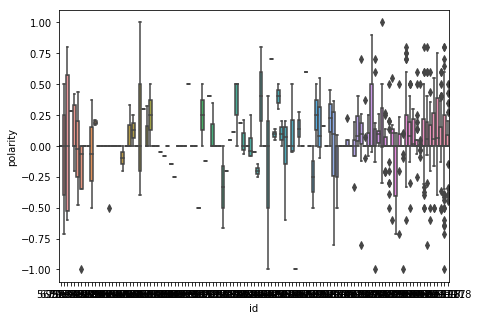

In [58]:
f, ax = plt.subplots(1,1,figsize=(7,5))
ax = sns.boxplot(x="id", y="polarity", data=data_id1)

Because the first plot is difficult to view, I'll create a second plot containing only users who have contributed more than 25 tweets to the dataset. It appears that the most prolific tweeters are also the most positive. 

In [59]:
my_id2 = char_list[ data.groupby('id')['id'].count() > 25 ]

In [60]:
data_id2 = data.loc[ [this_id in my_id2 for this_id in data['id']] ]

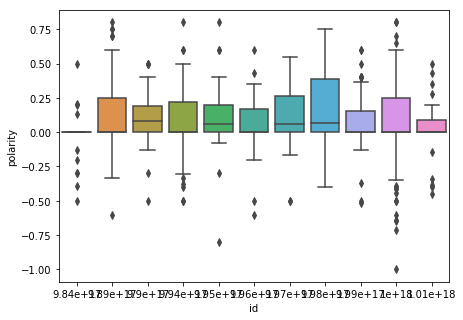

In [61]:
f, ax = plt.subplots(1,1,figsize=(7,5))
ax = sns.boxplot(x="id", y="polarity", data=data_id2)

Lastly, I want to create a word cloud to visualize the most commonly used words. First I'll join the preprocessed tweets into a single string, then I'll use the WordCloud package.

In [62]:
words = ' '.join(data['text'])

In [67]:
wordcloud = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(words)

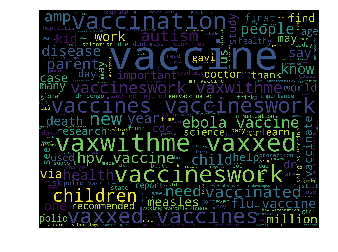

In [68]:
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

Just for fun I'm going to create the same word cloud, but apply a mask in the shape of the twitter logo. 

In [70]:
twitter_mask = imageio.imread('/Users/madelinecraft/Desktop/Classes/Python/twitter_mask.png')

In [72]:
wordcloud = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
                     ).generate(words)

/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


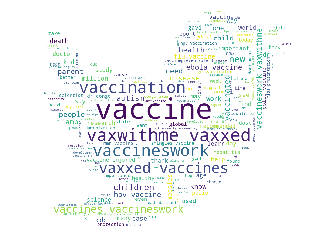

In [73]:
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
plt.show()

#### Convert Dataframe to a csv

This csv and the sentiment analysis that it contains will be used by Anna to fit a machine learning model which classifies correct information and misinformation based on sentiment and other covariates. 

In [74]:
data.to_csv('stacked_data.csv')